In [126]:
import solenoid_2d as s2d
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc
import importlib
importlib.reload(s2d)

import matplotlib as mpl

key="full_width_g"
#key="square"

if key == "full_width_g":
    w=4.7
    h=w/1.618

if key == "insert":
    w=4.7/2*(30/41)
#    h=w/1.618
    h=2*30/41

if key == "half_width_g":
    w=4.7/2
#    h=w/1.618
    h=2
if key == "full_width_10":
    w=4.7
    h=4
    
if key == "square":
    w=4.7
    h=4.7

mpl.rcParams['figure.figsize'] = [w, h]
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'

In [36]:
r,rho,z=s2d.grid_2d([0,.001],[-0.1,.1],[200,200])


I=1;          #current
nr=2;      #number of windings in r direction
nz=237;      #number of windings in z direction
dr=0.62*1E-3;  #wire height
dz=0.62*1E-3;  #wire width


R=.030/2+dr/2;
z0=-nz/2*dz;  #height from trap centre

sol=s2d.solenoid_2d_map(R,z0,dz,dr,nz,nr,r,I)

100%|██████████| 237/237 [00:04<00:00, 53.55it/s]

0.015309999999999999


In [50]:
magB=sol[0][2]
B_z_ax=magB[:,1]

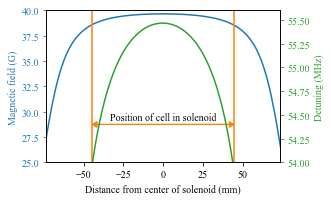

In [127]:
fig, ax1 = plt.subplots()
ax1.plot(z*1e3,B_z_ax*1e4)
ax1.set_xlim(np.array([z0,-z0])*1E3)
ax1.set_ylim(np.array([25,40]))
ax1.set_xlabel('Distance from center of solenoid (mm)')
ax1.set_ylabel('Magnetic field (G)',color='C0')
ax1.tick_params('y', colors='C0')

cell=(14.5-5.6)*10
cell_max=cell/2
cell_min=-cell/2

z_cell=z[np.argmin(abs(z*1e3-cell_min)):np.argmin(abs(z*1e3-cell_max))]
detune=B_z_ax[np.argmin(abs(z*1e3-cell_min)):np.argmin(abs(z*1e3-cell_max))]*1.399e4

ax2 = ax1.twinx()
ax2.plot(z_cell*1e3, detune,c='C2')
ax2.set_ylabel('Detuning (MHz)', color='C2')
ax2.tick_params('y', colors='C2')
ax2.vlines([cell_min,cell_max],40,60,color='C1')
ax2.arrow(cell_min,54.4,cell,0,color='C1',length_includes_head=True,head_length=3,head_width=.06)
ax2.arrow(cell_max,54.4,-cell,0,color='C1',length_includes_head=True,head_length=3,head_width=.06)
ax2.text(0,54.45,'Position of cell in solenoid',horizontalalignment='center')
ax2.set_ylim([54,55.6])

fig.tight_layout()

plt.savefig('lock_sys_fieldB.pdf',bbox='tight')

In [74]:
z[np.argmin(abs(z*1e3-cell_min)):np.argmin(abs(z*1e3-cell_max))]

array([-0.04472362, -0.04371859, -0.04271357, -0.04170854, -0.04070352,
       -0.03969849, -0.03869347, -0.03768844, -0.03668342, -0.03567839,
       -0.03467337, -0.03366834, -0.03266332, -0.03165829, -0.03065327,
       -0.02964824, -0.02864322, -0.02763819, -0.02663317, -0.02562814,
       -0.02462312, -0.02361809, -0.02261307, -0.02160804, -0.02060302,
       -0.01959799, -0.01859296, -0.01758794, -0.01658291, -0.01557789,
       -0.01457286, -0.01356784, -0.01256281, -0.01155779, -0.01055276,
       -0.00954774, -0.00854271, -0.00753769, -0.00653266, -0.00552764,
       -0.00452261, -0.00351759, -0.00251256, -0.00150754, -0.00050251,
        0.00050251,  0.00150754,  0.00251256,  0.00351759,  0.00452261,
        0.00552764,  0.00653266,  0.00753769,  0.00854271,  0.00954774,
        0.01055276,  0.01155779,  0.01256281,  0.01356784,  0.01457286,
        0.01557789,  0.01658291,  0.01758794,  0.01859296,  0.01959799,
        0.02060302,  0.02160804,  0.02261307,  0.02361809,  0.02

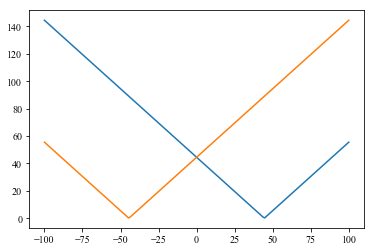

In [75]:
plt.plot(z*1e3,abs(z*1e3-cell_max))
plt.plot(z*1e3,abs(z*1e3-cell_min))

In [68]:
np.argmin(abs(z*1e3-cell_max))

100

In [69]:
cell_max

0.44500000000000006

In [72]:
(14.5-5.6)

8.9